In [109]:
# Emilie Helen Wolf
# April 21, 2022
# UT Capstone Project @ Great Learning

# This project demonstrates my ability to build a linear regression model
# for house price predictions while meeting all the assumptions

<IPython.core.display.Javascript object>

# 🔸 Objective
Predict the housing prices of a town or a suburb based on the features of the locality provided and identify the most important features to consider while predicting the prices.

# 🔸 Data Dictionary
This dataset has 23 features, price being the target variable. The details of all the features are given
below:
- cid: a notation for a house
- dayhours: Date house was sold
- price: Price is prediction target (in US dollars)
- room_bed: Number of Bedrooms per house
- room_bath: Number of bathrooms per bedrooms
- living_measure: square footage of the home
- lot_measure: square footage of the lot
- ceil: Total floors (levels) in house
- coast: House which has a view to a waterfront (0 - No, 1 - Yes)
- sight: Has been viewed
- condition: How good the condition is (Overall out of 5)
- quality: grade given to the housing unit, based on grading system
- ceil_measure: square footage of house apart from basement
- basement_measure: square footage of the basement
- yr_built: Built Year
- yr_renovated: Year when house was renovated
- zipcode: zip code
- lat: Latitude coordinate
- long: Longitude coordinate
- living_measure15: Living room area in 2015 (implies-- some renovations) This might or might not have affected the lot size area
- lot_measure15: lotSize area in 2015 (implies-- some renovations)
- furnished: Based on the quality of room (0 - No, 1 - Yes)
- total_area: Measure of both living and lot

# 🔸 Strategy for Milestone 1
#### 1. Check for discrepencies and describe the initial data
#### 2. Remove null placeholders and change column types for EDA
#### 3. Univariate and Bivariate Analysis

In [110]:
# Automatically structures Python code
%load_ext nb_black

# # to suppress warnings
import warnings

warnings.filterwarnings("ignore")

# import standard libraries for manipulating data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# display settings
pd.set_option("display.float_format", lambda x: "%.5f" % x)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
sns.set_style("darkgrid")
sns.set_context("talk")

# Read the XLSX and print 12 random rows
homes = pd.read_excel("House+Price+Prediction+-+Dataset.xlsx")
homes.sample(n=12, random_state=42)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


cid         dayhours    price  room_bed  room_bath  \
735    1862900350  20140610T000000   315000   4.00000    2.50000   
2830   5450900010  20140821T000000   993500   4.00000    2.25000   
4106   7237550110  20150424T000000  1180000   4.00000    3.25000   
16218  5029460180  20140916T000000   260000   4.00000    2.75000   
19964  8079040320  20150223T000000   430000   4.00000    3.00000   
1227   6178930340  20140630T000000   480000   4.00000    3.00000   
18849  2212900180  20141229T000000   220000   3.00000    1.00000   
19369  5364200620  20140814T000000   980000   3.00000    2.25000   
20164  7883604065  20150501T000000   210000   2.00000    1.00000   
7139   2426049113  20150414T000000   459000   4.00000    1.50000   
2174   4019300480  20141111T000000   502700   4.00000    3.50000   
13342  4123800330  20150501T000000   335000   3.00000    2.25000   

       living_measure  lot_measure    ceil coast   sight condition  quality  \
735        1930.00000   9643.00000       2     0 0.00000         4  7.00000   
2830       4070.00000  23321.00000       2     0 0.00000         4 10.00000   
4106       3750.00000  74052.00000       2     0 0.00000         3 10.00000   
16218      2250.00000   7345.00000       1     0 0.00000         4  8.00000   
19964      1850.00000   9976.00000       2     0 0.00000         3  8.00000   
1227       2440.00000   9664.00000       2     0 0.00000         3  8.00000   
18849      1230.00000   9720.00000       1     0 0.00000         5  7.00000   
19369      2390.00000   4590.00000       2     0 0.00000         3  8.00000   
20164      1100.00000   6000.00000 1.50000     0 0.00000         4  6.00000   
7139       2020.00000   9583.00000       2     0 0.00000         4  7.00000   
2174       2710.00000  14016.00000       2     0 0.00000         4  8.00000   
13342      1870.00000   5876.00000       2     0 0.00000         3  7.00000   

       ceil_measure  basement yr_built  yr_renovated  zipcode      lat  \
735      1930.00000   0.00000     1992             0    98031 47.40650   
2830     4070.00000   0.00000     1968             0    98040 47.55630   
4106     3750.00000   0.00000     2013             0    98053 47.65800   
16218    1320.00000 930.00000     1984             0    98023 47.28950   
19964    1850.00000   0.00000     1991             0    98059 47.50590   
1227     1890.00000 550.00000     1981             0    98028 47.76490   
18849    1230.00000   0.00000     1969             0    98042 47.32660   
19369    2090.00000 300.00000     1941          1998    98105 47.66150   
20164    1100.00000   0.00000     1900             0    98108 47.52750   
7139     2020.00000   0.00000     1963             0    98034 47.72830   
2174     2710.00000   0.00000     1968             0    98155 47.76010   
13342    1870.00000   0.00000     1986             0    98038 47.37790   

            long  living_measure15  lot_measure15  furnished total_area  
735   -122.18000        1930.00000     7525.00000    0.00000      11573  
2830  -122.21900        2820.00000    10871.00000    1.00000      27391  
4106  -122.00600        4920.00000    74052.00000    1.00000      77802  
16218 -122.37000        1800.00000     6950.00000    0.00000       9595  
19964 -122.14900        2270.00000     8542.00000    0.00000      11826  
1227  -122.25300        2380.00000     9609.00000    0.00000      12104  
18849 -122.13800        1230.00000     9720.00000    0.00000      10950  
19369 -122.27600        2280.00000     5179.00000    0.00000       6980  
20164 -122.32300        1280.00000     6000.00000    0.00000       7100  
7139  -122.23800        1770.00000     8625.00000    0.00000      11603  
2174  -122.28600        1590.00000    27903.00000    0.00000      16726  
13342 -122.04500        1670.00000     6203.00000    0.00000       7746

<IPython.core.display.Javascript object>

In [3]:
# Check the shape and missing values
homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

<IPython.core.display.Javascript object>

In [4]:
# Statistical summary of numerical features
homes.describe().T

count             mean              std           min  \
cid              21613.00000 4580301520.86499 2876565571.31205 1000102.00000   
price            21613.00000     540182.15879     367362.23172   75000.00000   
room_bed         21505.00000          3.37136          0.93029       0.00000   
room_bath        21505.00000          2.11517          0.77025       0.00000   
living_measure   21596.00000       2079.86076        918.49612     290.00000   
lot_measure      21571.00000      15104.58328      41423.61939     520.00000   
sight            21556.00000          0.23437          0.76644       0.00000   
quality          21612.00000          7.65686          1.17548       1.00000   
ceil_measure     21612.00000       1788.36656        828.10253     290.00000   
basement         21612.00000        291.52253        442.58084       0.00000   
yr_renovated     21613.00000         84.40226        401.67924       0.00000   
zipcode          21613.00000      98077.93980         53.50503   98001.00000   
lat              21613.00000         47.56005          0.13856      47.15590   
living_measure15 21447.00000       1987.06556        685.51963     399.00000   
lot_measure15    21584.00000      12766.54318      27286.98711     651.00000   
furnished        21584.00000          0.19672          0.39753       0.00000   

                              25%              50%              75%  \
cid              2123049194.00000 3904930410.00000 7308900445.00000   
price                321950.00000     450000.00000     645000.00000   
room_bed                  3.00000          3.00000          4.00000   
room_bath                 1.75000          2.25000          2.50000   
living_measure         1429.25000       1910.00000       2550.00000   
lot_measure            5040.00000       7618.00000      10684.50000   
sight                     0.00000          0.00000          0.00000   
quality                   7.00000          7.00000          8.00000   
ceil_measure           1190.00000       1560.00000       2210.00000   
basement                  0.00000          0.00000        560.00000   
yr_renovated              0.00000          0.00000          0.00000   
zipcode               98033.00000      98065.00000      98118.00000   
lat                      47.47100         47.57180         47.67800   
living_measure15       1490.00000       1840.00000       2360.00000   
lot_measure15          5100.00000       7620.00000      10087.00000   
furnished                 0.00000          0.00000          0.00000   

                              max  
cid              9900000190.00000  
price               7700000.00000  
room_bed                 33.00000  
room_bath                 8.00000  
living_measure        13540.00000  
lot_measure         1651359.00000  
sight                     4.00000  
quality                  13.00000  
ceil_measure           9410.00000  
basement               4820.00000  
yr_renovated           2015.00000  
zipcode               98199.00000  
lat                      47.77760  
living_measure15       6210.00000  
lot_measure15        871200.00000  
furnished                 1.00000

<IPython.core.display.Javascript object>

In [5]:
# What are the unique values counts for bedrooms?
homes["room_bed"].value_counts(dropna=False)

3.00000     9767
4.00000     6854
2.00000     2747
5.00000     1595
6.00000      270
1.00000      197
NaN          108
7.00000       38
8.00000       13
0.00000       13
9.00000        6
10.00000       3
33.00000       1
11.00000       1
Name: room_bed, dtype: int64

<IPython.core.display.Javascript object>

In [6]:
# What are the unique values counts for ceil (number of floors/levels)?
homes["ceil"].value_counts(dropna=False)

1      10647
2       8210
1.5     1905
3        610
2.5      161
NaN       42
$         30
3.5        8
Name: ceil, dtype: int64

<IPython.core.display.Javascript object>

In [7]:
# How many unique homes?
homes["cid"].nunique()

21436

<IPython.core.display.Javascript object>

In [8]:
# How many duplicate rows?
homes.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [9]:
# Look at the unique counts for all object columns
homes.describe(include="object").T

count    unique              top      freq
dayhours         21613       372  20140623T000000       142
ceil             21571         7                1     10647
coast            21612         3                0     21421
condition        21556         6                3     13978
yr_built         21612       117             2014       559
long       21613.00000 753.00000       -122.29000 116.00000
total_area       21584     11145                $        39

<IPython.core.display.Javascript object>

In [10]:
# What's the error in coast?
homes["coast"].value_counts(dropna=False)

0      21421
1        161
$         30
NaN        1
Name: coast, dtype: int64

<IPython.core.display.Javascript object>

In [11]:
# What are the unique value counts in sight?
homes["sight"].value_counts(dropna=False)

0.00000    19437
2.00000      959
3.00000      510
1.00000      332
4.00000      318
NaN           57
Name: sight, dtype: int64

<IPython.core.display.Javascript object>

In [12]:
# What are the unique value counts in condition?
homes["condition"].value_counts(dropna=False)

3      13978
4       5655
5       1694
2        171
NaN       57
1         30
$         28
Name: condition, dtype: int64

<IPython.core.display.Javascript object>

In [13]:
# What are the unique value counts in quality?
homes["quality"].value_counts(dropna=False)

7.00000     8981
8.00000     6067
9.00000     2615
6.00000     2038
10.00000    1134
11.00000     399
5.00000      242
12.00000      90
4.00000       29
13.00000      13
3.00000        3
NaN            1
1.00000        1
Name: quality, dtype: int64

<IPython.core.display.Javascript object>

In [14]:
## What are the unique value counts in yr_built?
homes["yr_built"].value_counts(dropna=False)

2014    559
2006    454
2005    450
2004    433
2003    421
2007    417
1977    417
1978    387
1968    381
2008    367
1967    350
1979    343
1959    334
1990    319
1962    312
1954    305
2001    305
1987    293
1989    289
1969    280
1988    270
1955    269
1999    265
1947    263
1963    256
1976    253
1950    250
1966    250
1994    249
1960    247
1980    240
1998    239
1948    235
2009    230
1951    229
1984    229
1985    228
1961    224
1991    224
1958    224
1942    223
2002    222
1953    222
1952    220
2000    218
1986    215
1983    211
1993    202
2013    201
1981    199
1992    198
1956    198
1957    198
1996    195
1949    195
1975    189
1965    187
1926    180
1997    177
1964    172
1943    170
2012    170
1995    169
1925    165
1974    162
1941    161
1940    156
1972    149
1973    148
2010    143
1944    140
1924    137
1910    134
1970    132
2011    130
1928    126
1946    126
1918    119
1927    115
1929    114
1939    106
1982    105
1971    104
1920

<IPython.core.display.Javascript object>

In [15]:
# What are the unique value counts in yr_renovated?
homes["yr_renovated"].value_counts(dropna=False)

0       20699
2014       91
2013       37
2003       36
2007       35
2000       35
2005       35
2004       26
1990       25
2006       24
2009       22
2002       22
1989       22
1991       20
1994       19
1993       19
1998       19
2001       19
2010       18
1983       18
2008       18
1984       18
1987       18
1986       17
1985       17
1992       17
1999       17
1995       16
2015       16
1988       15
1996       15
1997       15
2011       13
1980       11
2012       11
1982       11
1979       10
1970        9
1968        8
1977        8
1978        6
1975        6
1964        5
1981        5
1958        5
1965        5
1973        5
1960        4
1972        4
1963        4
1969        4
1976        3
1956        3
1945        3
1957        3
1953        3
1974        3
1955        3
1950        2
1967        2
1971        2
1940        2
1962        2
1946        2
1934        1
1948        1
1954        1
1951        1
1944        1
1959        1
Name: yr_renovated, 

<IPython.core.display.Javascript object>

In [16]:
# Which zip codes have the most datapoints?
homes["zipcode"].value_counts().head(10)

98103    602
98038    590
98115    583
98052    574
98117    553
98042    548
98034    545
98118    508
98023    499
98006    498
Name: zipcode, dtype: int64

<IPython.core.display.Javascript object>

In [17]:
# What are the unique value counts in furnished?
homes["furnished"].value_counts(dropna=False)

0.00000    17338
1.00000     4246
NaN           29
Name: furnished, dtype: int64

<IPython.core.display.Javascript object>

In [18]:
homes["zipcode"].nunique()

70

<IPython.core.display.Javascript object>

## Initial Look 👀
- No duplicate rows found, but...
- `cid`, the ID of the homes, has some repeats. This column can probably be dropped
- `dayhours` needs to be converted to datetime
- `price` is our target variable, and the average is `$540,182` or about half a million dollars
- `room_bed` are all whole numbers with 108 nulls
- `room_bath` seems to have quarter, half, and 3/4 bathrooms
    - The bedroom and bathroom columns have the same number of missing values (108)
    - They both also have mininum values of 0, which doesn't make sense to have a house without rooms
    - The extremely high values (33 and 8) need to be cross-checked against square footage
- `living_measure` has an average of `2080` square feet and has nulls
- `lot_measure` has an average of `15,105` square feet and has nulls
- `ceil` has some half measures as well as nulls AND `$` sign values that need treatment
- `coast` has nulls and `$` signs that need treatment
- `sight` has some nulls but otherwise has whole numbers as expected
- `condition` has nulls (same # as `sight`) and `$` signs, but othwerwise has whole numbers 1 through 5 as expected
- `quality` ranges from 1 to 13 and has 1 null
- `ceil_measure` has 1 null value and an average of `1788` square feet
- `basement` has 1 null and at least 50% of homes don't have a basement (0 sq ft)
- `yr_built` has 1 null and some `$` signs again, but the years seem normal (between 1900 and 2015)
- `yr_renovated` has 0s for the homes without renovation
- `zipcode` ranges from 98001 to 98199, which are all around Seattle, Washington. These will need to be treated as categories
- `lat` seems normal, but `long` must have some `$` signs since it's showing up as an object column
    - the coordinates match up with Seattle, Washington
- `living_measure15` and `lot_measure15` have some nulls and seems to have expected values
- `furnished` has all 0s and 1s as expected, with 29 nulls
- `total_area` has missing values and `$` signs that need treatment

# 🔸 Main Takeaways
1. We have data on houses sold in the Seattle, Washington area from 70 different zip codes, ranging from \\$75K to \\$7.7M
2. The dataset has 21,613 rows and 23 columns, and it's estimated that at least 21,400 of those rows are complete and error-free
3. We will need to treat missing values, errors, category types, and highly correlated variables before building a model

## Further questions to answer later when error-checking and feature engineering:
- Does `lot_measure` plus `living_measure` always equal `total_area`?
- Does `ceil_measure` plus `basement` always equal `living_measure`?
- Should we calculate a new variable called `total_area15` based on `lot_measure15` and `living_measure15`?
- Should we make a new dummy variable called `renovated` and then combine the 2015 measurement columns?
- Can we add more columns such as `school_proximity`, `nearest_school_rating`, or `floodplain` based on coordinates?
- What's the deal with houses having 0 bathrooms or bedrooms? Were they built in the early 1900s?
- Maybe we can replace `zipcode` with `per_capita_income` so it's 1 continuous variable instead of needing 70 dummy variables

## Now let's make sure all the columns are numerical for EDA

In [102]:
# Make a copy of the dataframe
df = homes.copy()

# Convert `dayhours` to datetime
df["dayhours"] = pd.to_datetime(df["dayhours"])

# change all $ to NaN
df.replace({"$": np.nan}, inplace=True)

# verify all columns are numerical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cid               21613 non-null  int64         
 1   dayhours          21613 non-null  datetime64[ns]
 2   price             21613 non-null  int64         
 3   room_bed          21505 non-null  float64       
 4   room_bath         21505 non-null  float64       
 5   living_measure    21596 non-null  float64       
 6   lot_measure       21571 non-null  float64       
 7   ceil              21541 non-null  float64       
 8   coast             21582 non-null  float64       
 9   sight             21556 non-null  float64       
 10  condition         21528 non-null  float64       
 11  quality           21612 non-null  float64       
 12  ceil_measure      21612 non-null  float64       
 13  basement          21612 non-null  float64       
 14  yr_built          2159

<IPython.core.display.Javascript object>

In [103]:
# Check the statistical summary again
df.describe().T

count             mean              std           min  \
cid              21613.00000 4580301520.86499 2876565571.31205 1000102.00000   
price            21613.00000     540182.15879     367362.23172   75000.00000   
room_bed         21505.00000          3.37136          0.93029       0.00000   
room_bath        21505.00000          2.11517          0.77025       0.00000   
living_measure   21596.00000       2079.86076        918.49612     290.00000   
lot_measure      21571.00000      15104.58328      41423.61939     520.00000   
ceil             21541.00000          1.49413          0.53991       1.00000   
coast            21582.00000          0.00746          0.08605       0.00000   
sight            21556.00000          0.23437          0.76644       0.00000   
condition        21528.00000          3.40933          0.65071       1.00000   
quality          21612.00000          7.65686          1.17548       1.00000   
ceil_measure     21612.00000       1788.36656        828.10253     290.00000   
basement         21612.00000        291.52253        442.58084       0.00000   
yr_built         21598.00000       1971.00935         29.37344    1900.00000   
yr_renovated     21613.00000         84.40226        401.67924       0.00000   
zipcode          21613.00000      98077.93980         53.50503   98001.00000   
lat              21613.00000         47.56005          0.13856      47.15590   
long             21579.00000       -122.21384          0.14087    -122.51900   
living_measure15 21447.00000       1987.06556        685.51963     399.00000   
lot_measure15    21584.00000      12766.54318      27286.98711     651.00000   
furnished        21584.00000          0.19672          0.39753       0.00000   
total_area       21545.00000      17192.04163      41628.68828    1423.00000   

                              25%              50%              75%  \
cid              2123049194.00000 3904930410.00000 7308900445.00000   
price                321950.00000     450000.00000     645000.00000   
room_bed                  3.00000          3.00000          4.00000   
room_bath                 1.75000          2.25000          2.50000   
living_measure         1429.25000       1910.00000       2550.00000   
lot_measure            5040.00000       7618.00000      10684.50000   
ceil                      1.00000          1.50000          2.00000   
coast                     0.00000          0.00000          0.00000   
sight                     0.00000          0.00000          0.00000   
condition                 3.00000          3.00000          4.00000   
quality                   7.00000          7.00000          8.00000   
ceil_measure           1190.00000       1560.00000       2210.00000   
basement                  0.00000          0.00000        560.00000   
yr_built               1951.00000       1975.00000       1997.00000   
yr_renovated              0.00000          0.00000          0.00000   
zipcode               98033.00000      98065.00000      98118.00000   
lat                      47.47100         47.57180         47.67800   
long                   -122.32800       -122.23000       -122.12500   
living_measure15       1490.00000       1840.00000       2360.00000   
lot_measure15          5100.00000       7620.00000      10087.00000   
furnished                 0.00000          0.00000          0.00000   
total_area             7032.00000       9575.00000      13000.00000   

                              max  
cid              9900000190.00000  
price               7700000.00000  
room_bed                 33.00000  
room_bath                 8.00000  
living_measure        13540.00000  
lot_measure         1651359.00000  
ceil                      3.50000  
coast                     1.00000  
sight                     4.00000  
condition                 5.00000  
quality                  13.00000  
ceil_measure           9410.00000  
basement               4820.00000  
yr_built               2015.00000  
yr_renov

<IPython.core.display.Javascript object>

# 🔸 Univariate Analysis

In [104]:
# What is the date range?
print(df["dayhours"].min())
print(df["dayhours"].max())

2014-05-02 00:00:00
2015-05-27 00:00:00


<IPython.core.display.Javascript object>

Text(0.5, 0, 'Months')

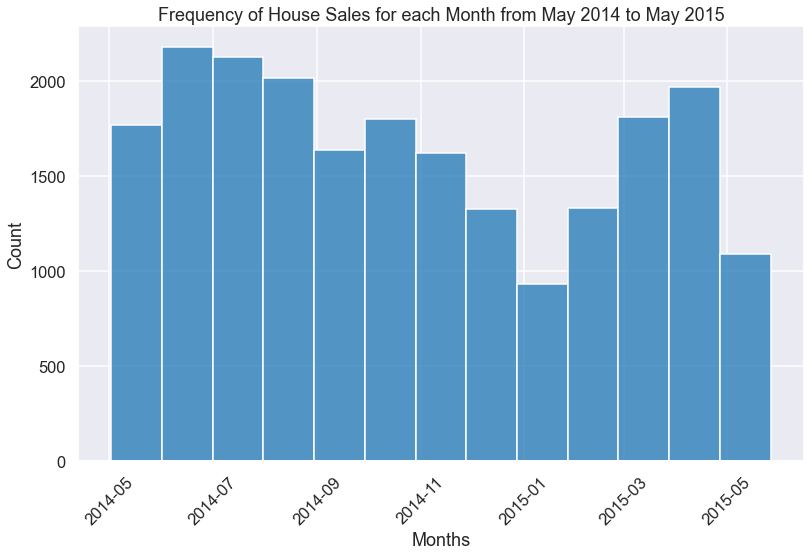

<IPython.core.display.Javascript object>

In [21]:
# Plot histogram of dates
plt.figure(figsize=(13, 8))
sns.histplot(data=df, x="dayhours", bins=13)
plt.xticks(rotation=45)
plt.title("Frequency of House Sales for each Month from May 2014 to May 2015")
plt.xlabel("Months")

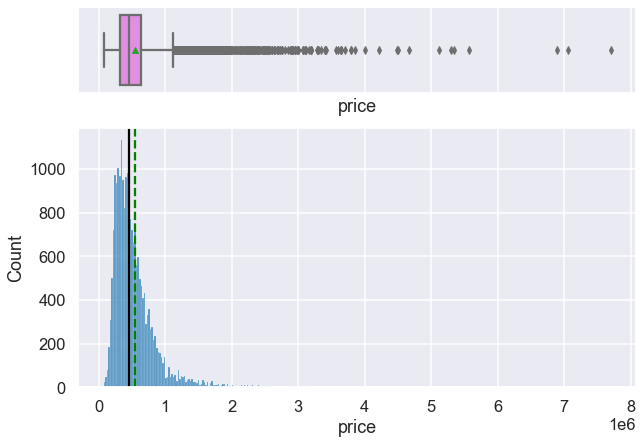

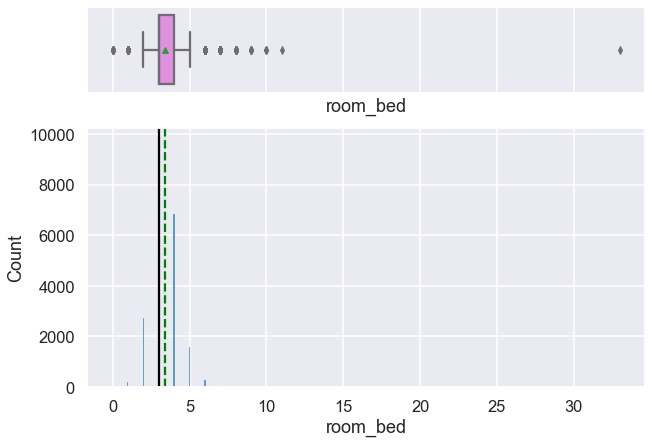

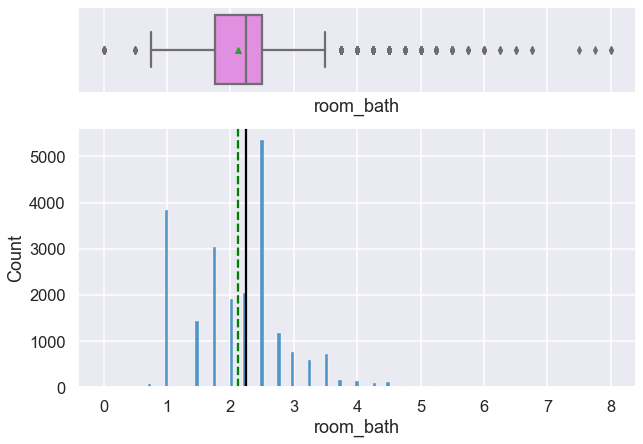

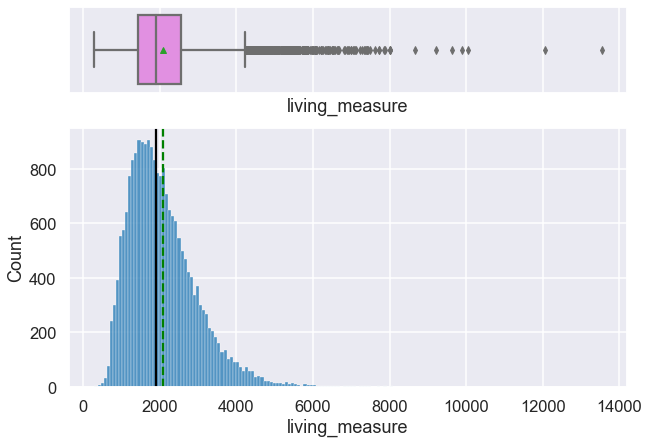

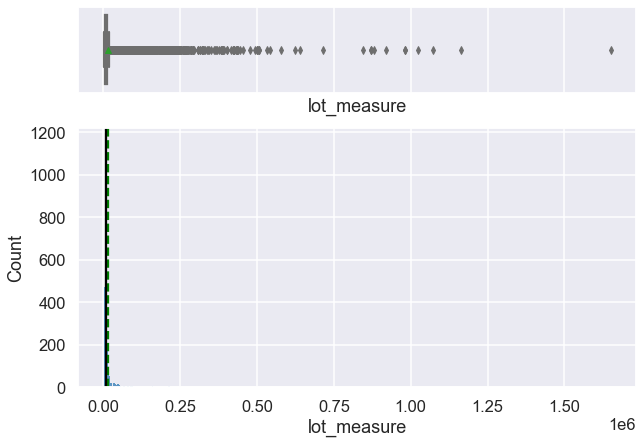

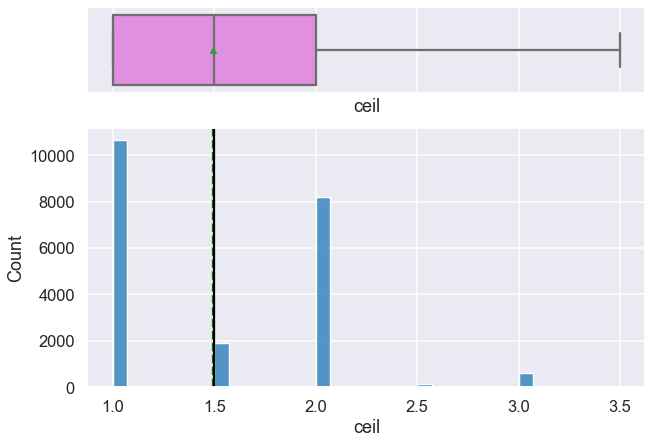

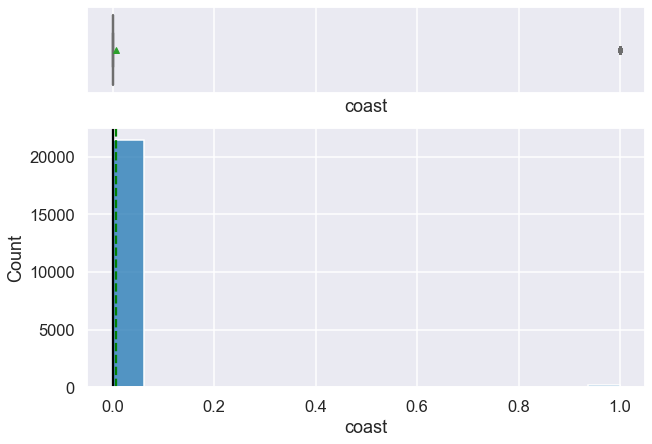

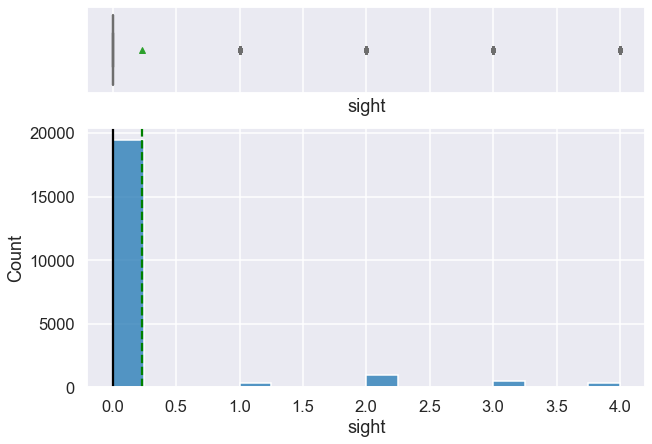

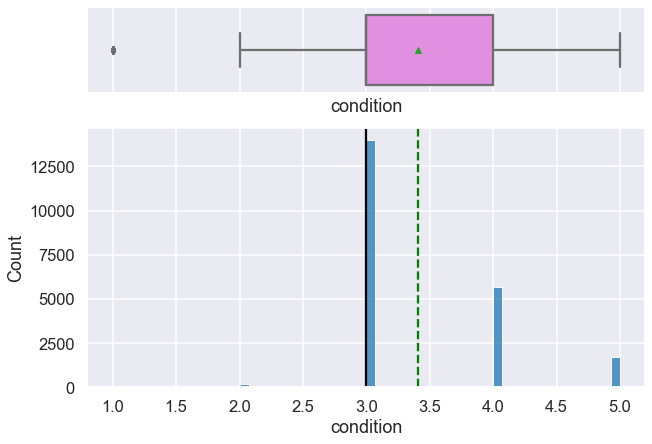

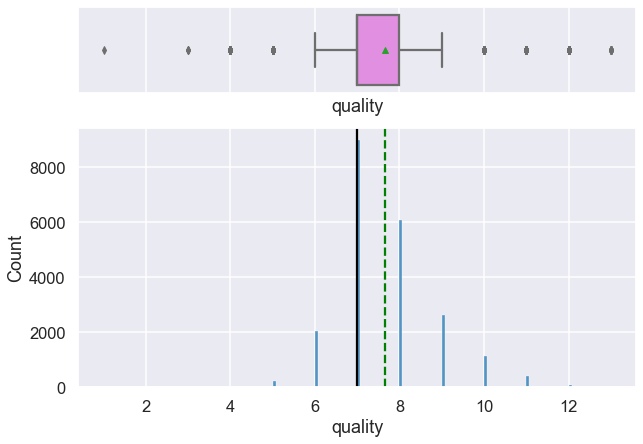

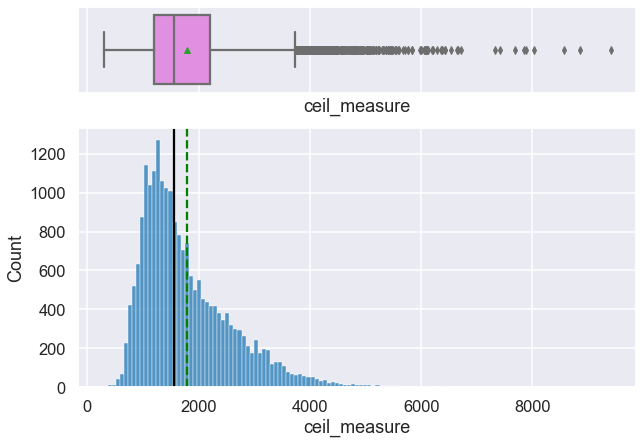

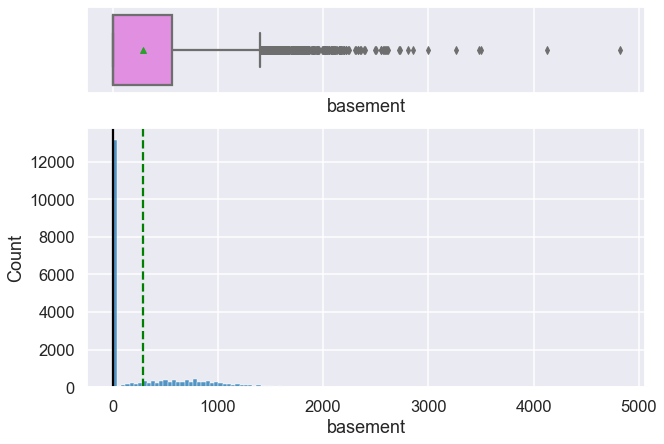

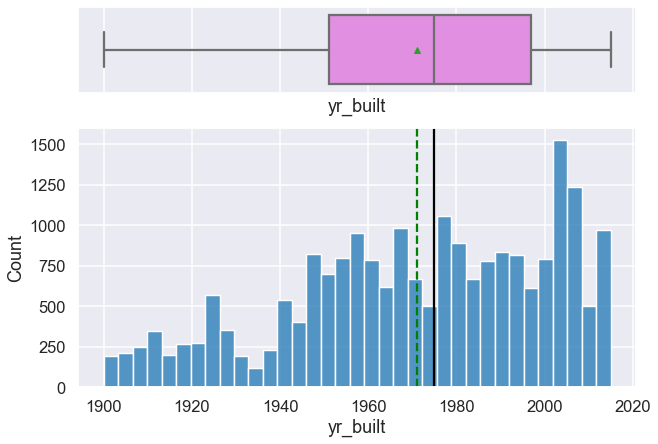

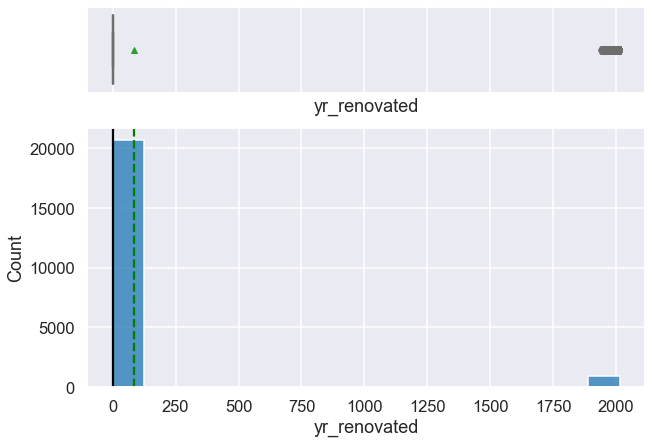

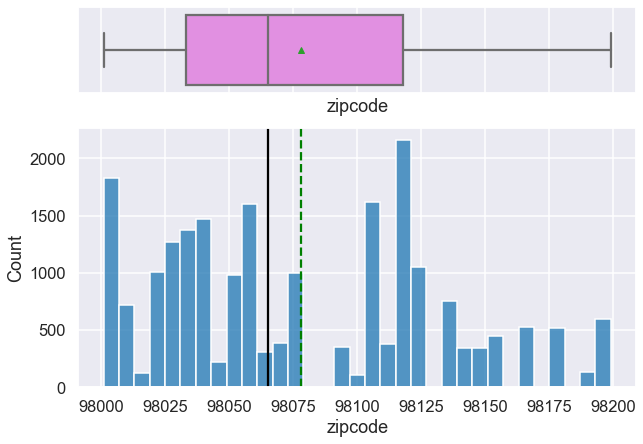

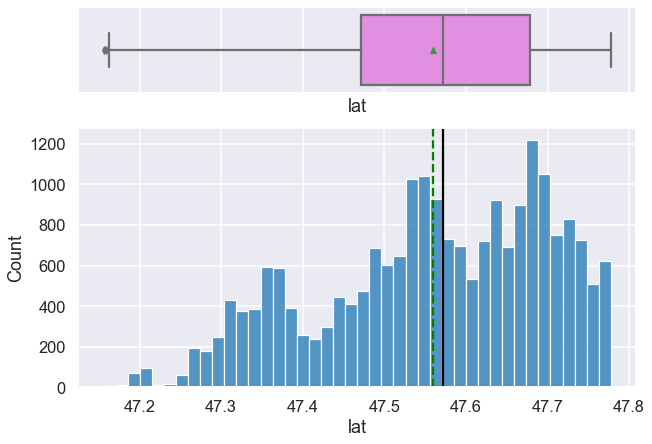

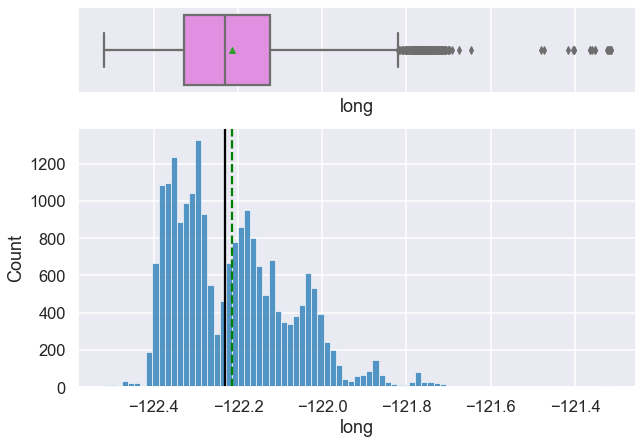

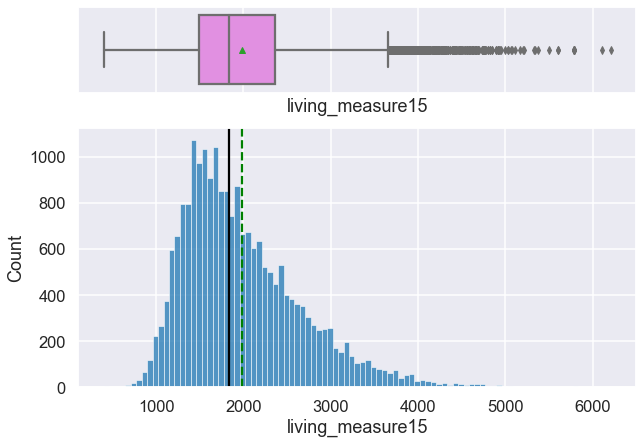

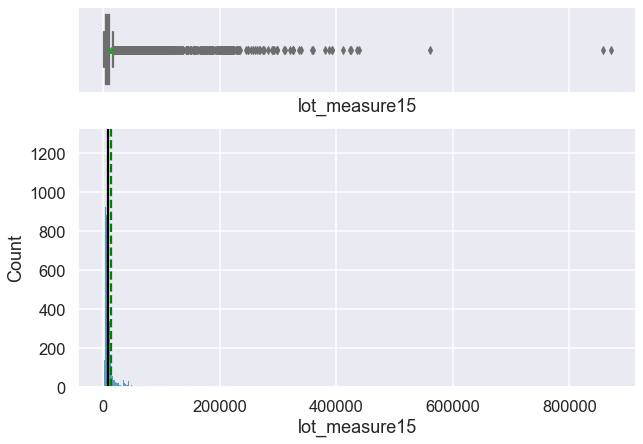

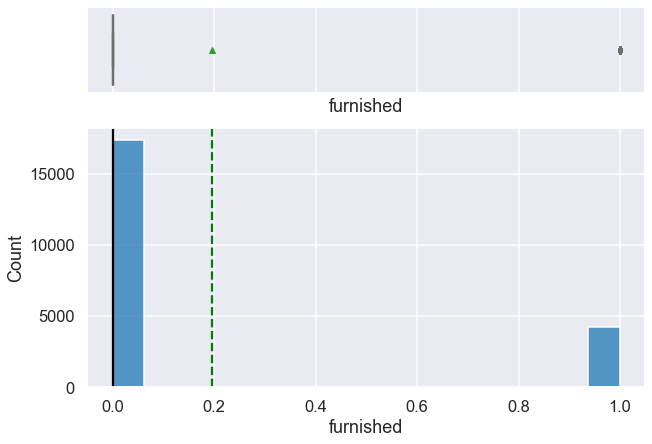

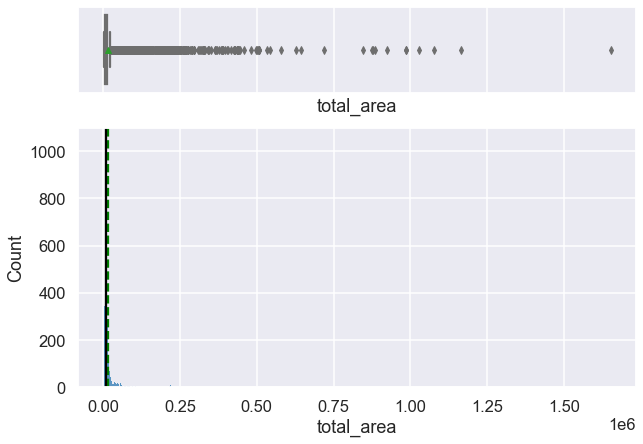

<IPython.core.display.Javascript object>

In [111]:
### Plotting all the features in one go (except for `cid` and `dayhours`)

# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(10, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


for feature in df.drop(["cid", "dayhours"], axis=1).columns:
    histogram_boxplot(
        df, feature, figsize=(10, 7), kde=False, bins=None,
    )

## Univariate Observations 👀
- There is a sharp decline in house sales during the month of January and the two busiest months were June and July
- House prices have a somewhat normal distribution and it is very right-skewed with the outliers being above $1.2M
- Most houses have 3 bedrooms and the distribution is right-skewed 
- Most houses have 2.5 or 1 bathroom and the distribution doesn't seem normal
- Square footage of living area is normally distributed and right-skewed, same as celing measure and renovated living measure
- Lot measure, renovated lot measure, and total area all have small spreads (very narrow peaks) and are right-skewed
- Most houses have 1 or 2 floors, and some have 1.5 or 3 floors, showing that the spread is not normal
- Only a tiny fraction of houses in the Seattle area have waterfront views
- As for sight, most house have not been viewed at all
- Condition is not normally spread; most houses are rated 3, 4, or 5 out of 5
- For the quality rating (1-13), most houses score a 7, and the distribution is normal with a right-skew
- Most houses don't have a basement, but the square footage seems normal and right-skewed for those that do
- There is a steady trend of more houses having been built more recently
    - There is a dip in houses built in the mid 1930s (aligns with Great Depression)
    - There is a surge of houses built in the early 2000s (aligns with housing bubble and over-extended credit)
    - There is a huge dip again in the late 2000s (housing crash of 2008)
- Most houses have not been renovated, but we will need to remove the 0s to see the distribution in the years renovated
- Some zip codes have more house sales than others, but it's hard to say why without finding the area of each zip code
- Latitude and Longitude have some interesting spreads and might make a beatiful contour or heatmap!
- Most houses sold are not furnished

# 🔸 Bivariate and Multivariate Analysis

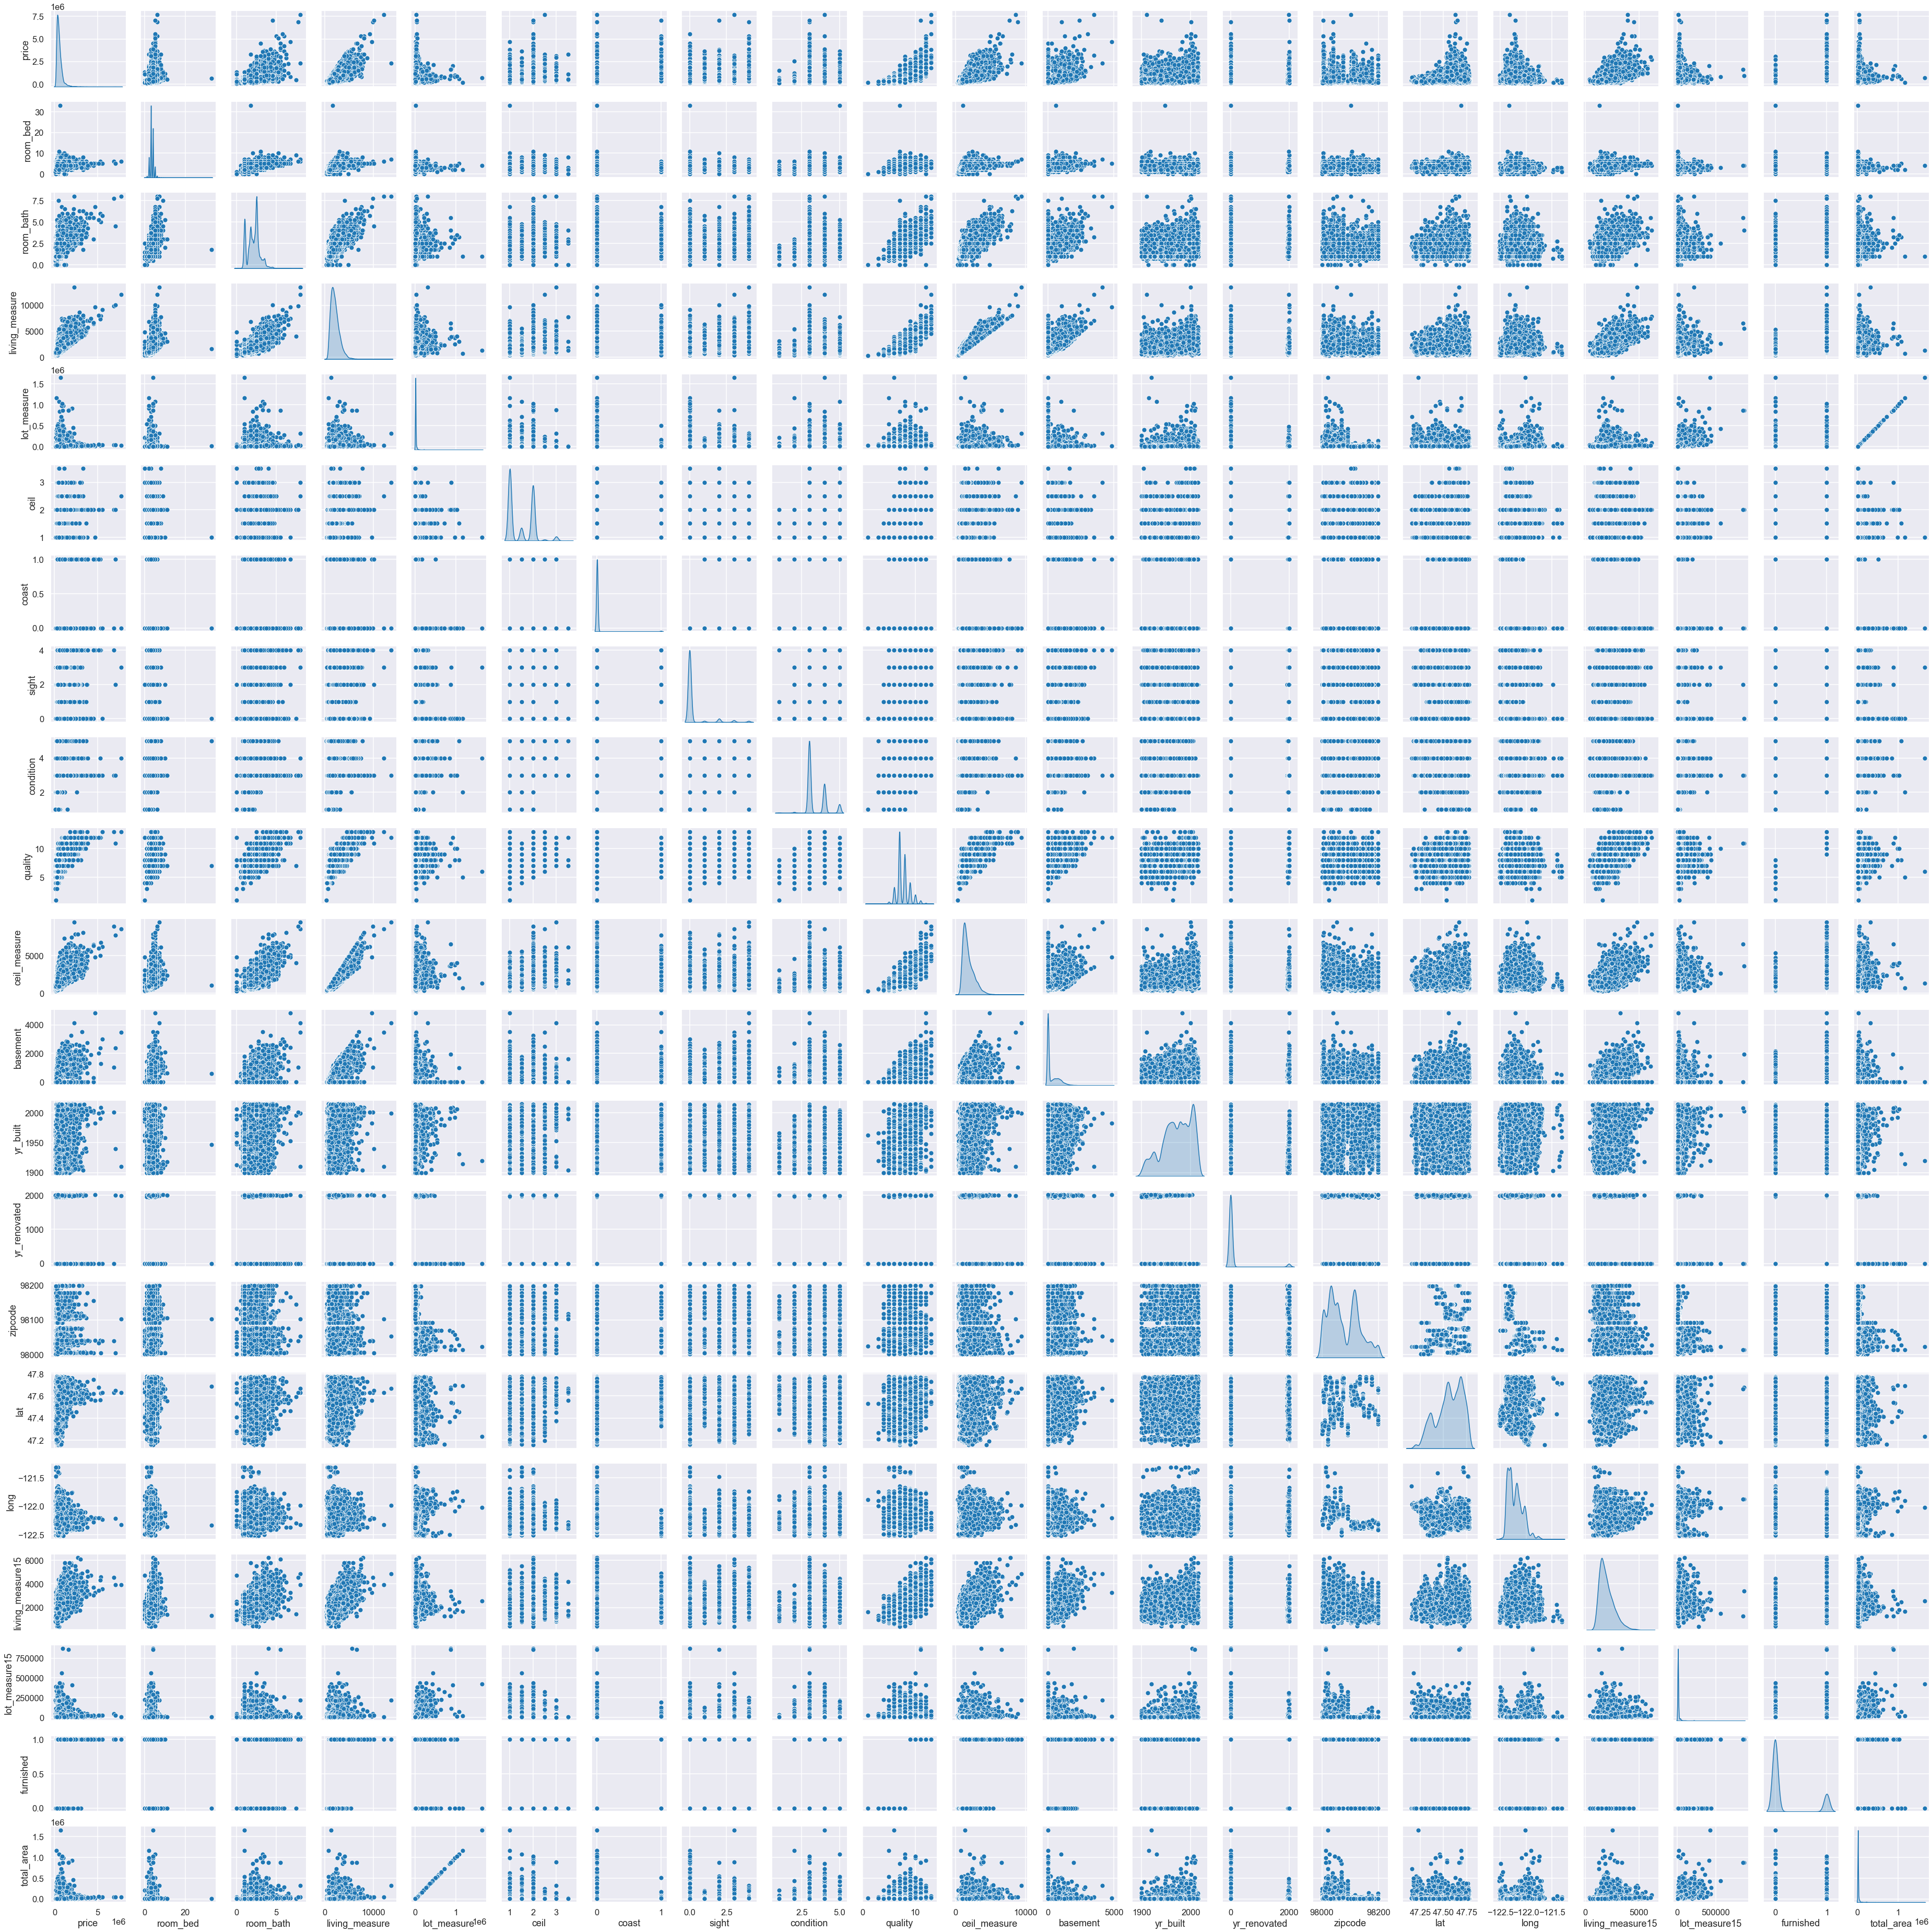

<IPython.core.display.Javascript object>

In [23]:
# Look at all bivariate plots in one go
sns.pairplot(df.drop(["cid", "dayhours"], axis=1), diag_kind="kde")

## Observations: 
- There is a good number of positive relationships, some stronger than others (especially `lot_measure15` vs `total_area`)
- If there are negative relationships, they are not easy to spot in these scatteplots

Text(0.5, 1.0, 'Correlation Coefficients of Numerical Variables')

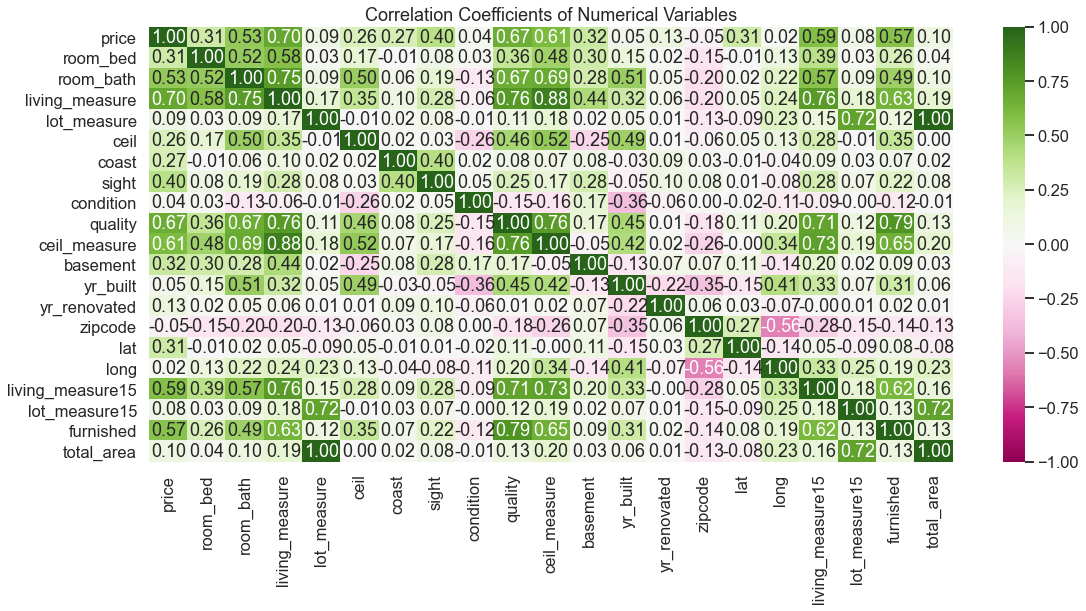

<IPython.core.display.Javascript object>

In [24]:
# Correlations

plt.figure(figsize=(18, 8))
sns.heatmap(
    df.drop(["cid", "dayhours"], axis=1).corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    cmap="PiYG",
    fmt=".2f",
)
plt.title("Correlation Coefficients of Numerical Variables")

## Observations:
- There are some obvious correlations here, such as all the square footage measurements (living, lot, ceiling, total)
- `price` is the most highly correlated with `living_measure`, then followed by `quality`
- As before, we see the disturbingly high correlation between `lot_measure` and `total_area` that needs to be investigated
- The `zipcode` correlations can be ignored because they will be either dropped or treated as categories later for modeling
- Surprisingly, there is a negative correlation between `yr_built` and `condition` implying that older houses are in better condition than new ones.
- `quality` and `furnished` are also strongly correlated implying a seller could get a better quality score if they sell a house that is already furnished
- The number of bathrooms also seems like a strong influencer throughout all the features

### 🙃 Which zip codes have the highest median listing price? 📈
Supposedly the most expensive Seattle neighborhood is West Queen Anne, which has zip codes 98109 and 98119

In [25]:
# Print the top 10 most expensive zip codes
homes.groupby("zipcode")["price"].median().sort_values(ascending=False).head(10)

zipcode
98039   1895000.00000
98004   1150000.00000
98040    993750.00000
98112    915000.00000
98005    765475.00000
98006    760184.50000
98119    744975.00000
98075    739999.00000
98109    736000.00000
98102    720000.00000
Name: price, dtype: float64

<IPython.core.display.Javascript object>

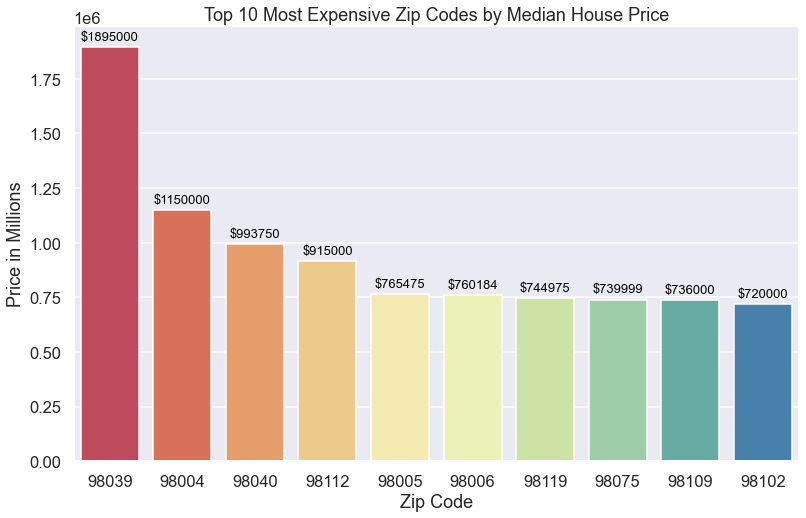

<IPython.core.display.Javascript object>

In [26]:
plt.figure(figsize=(13, 8))
chart = sns.barplot(
    data=homes,
    estimator=np.median,
    x="zipcode",
    y="price",
    palette="Spectral",
    order=homes.groupby("zipcode")["price"]
    .median()
    .sort_values(ascending=False)
    .head(10)
    .index,
    ci=None,
)
plt.title("Top 10 Most Expensive Zip Codes by Median House Price")
plt.ylabel("Price in Millions")
plt.xlabel("Zip Code")

for p in chart.patches:
    chart.annotate(
        "$%.0f" % p.get_height(),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        fontsize=13,
        color="black",
        xytext=(0, 10),
        textcoords="offset points",
    )

### 🙃 Which zip codes have the lowest median listing price? 📉

In [27]:
# Print the 10 least expensive zip codes
homes.groupby("zipcode")["price"].median().sort_values(ascending=True).head(10)

zipcode
98002   235000.00000
98168   235000.00000
98032   249000.00000
98001   260000.00000
98188   264000.00000
98198   265000.00000
98003   267475.00000
98023   268450.00000
98148   278000.00000
98178   278277.00000
Name: price, dtype: float64

<IPython.core.display.Javascript object>

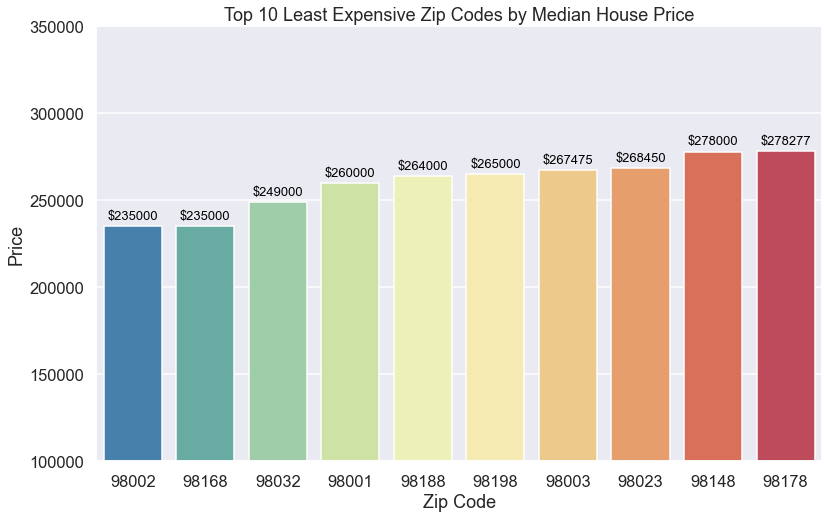

<IPython.core.display.Javascript object>

In [28]:
plt.figure(figsize=(13, 8))
chart = sns.barplot(
    data=homes,
    estimator=np.median,
    x="zipcode",
    y="price",
    palette="Spectral_r",
    order=homes.groupby("zipcode")["price"]
    .median()
    .sort_values(ascending=True)
    .head(10)
    .index,
    ci=None,
)
plt.title("Top 10 Least Expensive Zip Codes by Median House Price")
plt.ylabel("Price")
plt.xlabel("Zip Code")
plt.ylim(100000, 350000)

for p in chart.patches:
    chart.annotate(
        "$%.0f" % p.get_height(),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        fontsize=13,
        color="black",
        xytext=(0, 10),
        textcoords="offset points",
    )

### 🙃 How is price related to coast view and living measure?

Text(0.5, 0, 'Square Footage of Living Area')

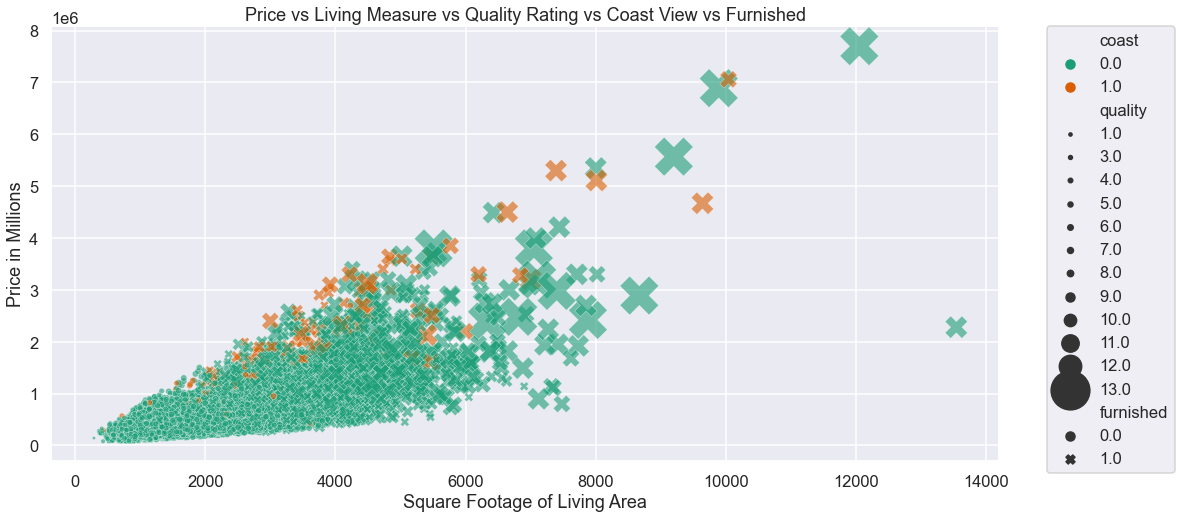

<IPython.core.display.Javascript object>

In [108]:
plt.figure(figsize=(17, 8))

sns.scatterplot(
    data=df,
    y="price",
    palette="Dark2",
    alpha=0.6,
    legend="brief",
    x="living_measure",
    hue="coast",
    style="furnished",
    size="quality",
    sizes=[10, 15, 20, 25, 30, 35, 40, 80, 150, 300, 500, 1500],
)
plt.title("Price vs Living Measure vs Quality Rating vs Coast View vs Furnished")
plt.legend(
    bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0,
)
plt.ylabel("Price in Millions")
plt.xlabel("Square Footage of Living Area")

### 🙃 How is price related to total area and coast?

Text(0.5, 1.0, 'Price vs Total Area vs Coast View')

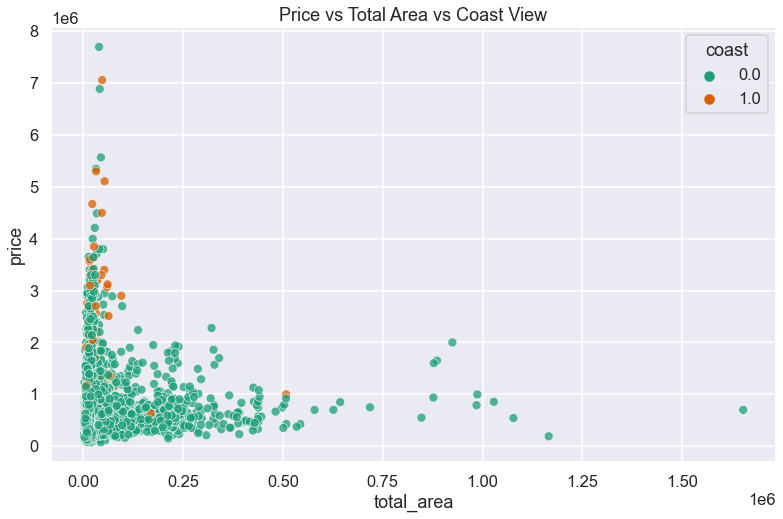

<IPython.core.display.Javascript object>

In [31]:
plt.figure(figsize=(13, 8))

sns.scatterplot(
    data=df,
    y="price",
    palette="Dark2",
    alpha=0.75,
    legend="brief",
    x="total_area",
    hue="coast",
)
plt.title("Price vs Total Area vs Coast View")

Text(0.5, 1.0, 'Histogram of Housing Sales over Time by Condition')

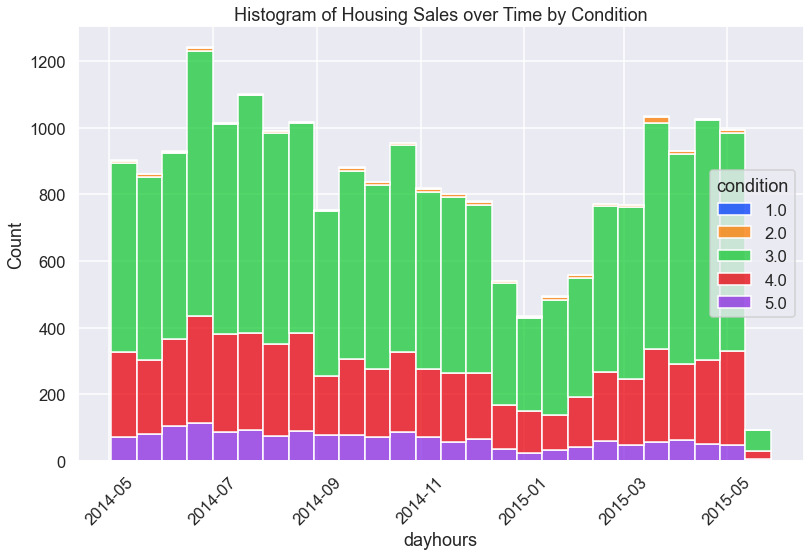

<IPython.core.display.Javascript object>

In [32]:
# Histogram of Housing Prices over Time
plt.figure(figsize=(13, 8))
sns.histplot(
    data=df, x="dayhours", palette="bright", hue="condition", multiple="stack",
)
plt.xticks(rotation=45)
plt.title("Histogram of Housing Sales over Time by Condition")

Text(0.5, 1.0, 'Average House Sale Price over Time')

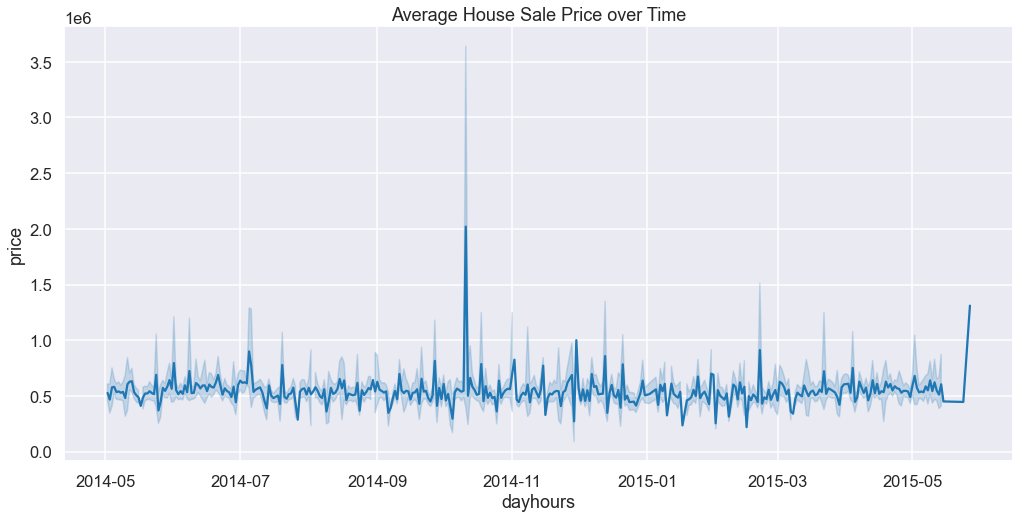

<IPython.core.display.Javascript object>

In [33]:
# What is the average house price over time?
plt.figure(figsize=(17, 8))
sns.lineplot(data=df, y="price", x="dayhours")
plt.title("Average House Sale Price over Time")

## Observations:
- There appears to be at least one or two major outliers disrupting the plots
- Most houses are rated 3 or 4 out of 5 in the condition feature
- The house prices over time are pretty even when averaged out

Text(0.5, 1.0, 'Density of House Sales by Latitude and Longitude')

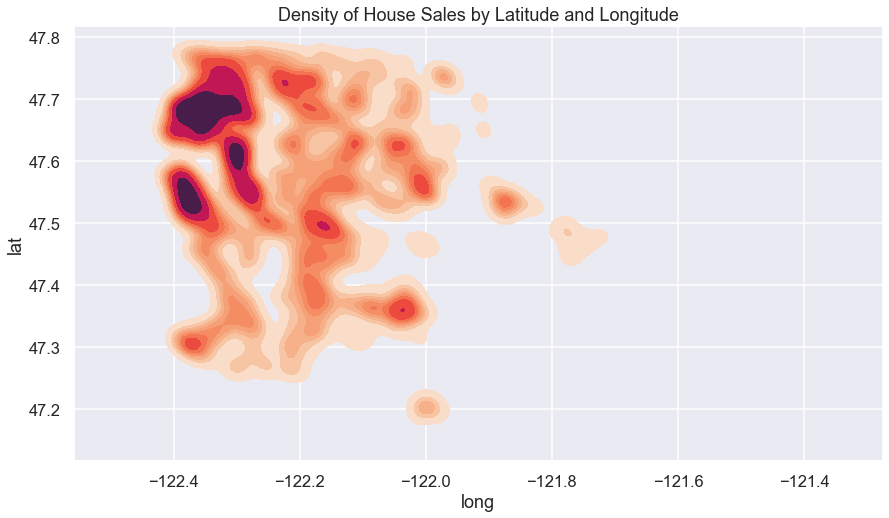

<IPython.core.display.Javascript object>

In [56]:
# Let's look at a contour plot of houses sold by latitude and longitude
plt.figure(figsize=(14.5, 8))
sns.kdeplot(data=df, x="long", y="lat", cmap="rocket_r", shade=True, bw_adjust=0.5)
plt.title("Density of House Sales by Latitude and Longitude")

## This is so interesting!
- There is a high concentration of sales near the city center of Seattle

Text(0.5, 1.0, 'Zip Codes Plotted by Latitude and Longitude')

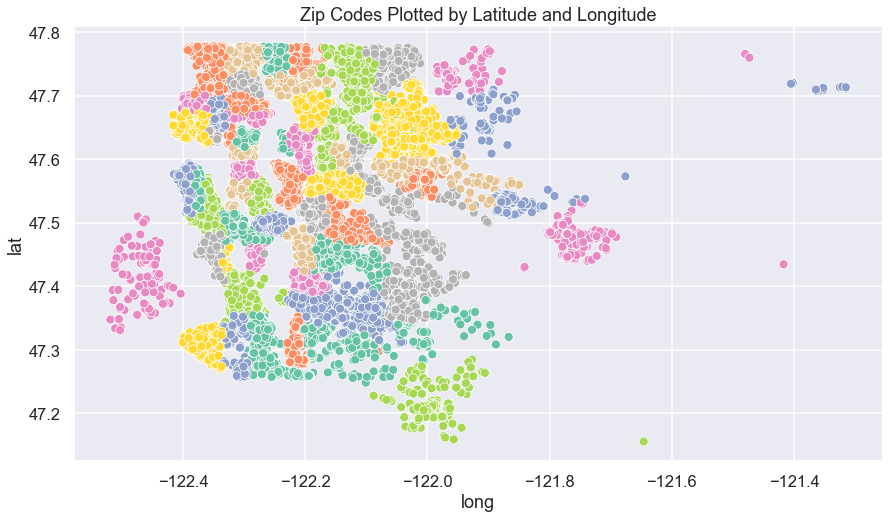

<IPython.core.display.Javascript object>

In [35]:
# What about a scatterplot of latitutde and longitude with a hue of zip code?
plt.figure(figsize=(14.5, 8))
sns.scatterplot(data=df, x="long", y="lat", hue="zipcode", palette="Set2", legend=False)
plt.title("Zip Codes Plotted by Latitude and Longitude")

### Map of Seattle Zip Codes for Comparison
<img src="seattlezipcodemap.png" alt="drawing" width="500"/>
<img src="seattlezipzoomin.png" alt="drawing" width="500"/>

Text(0.5, 1.0, 'Density of House Sales')

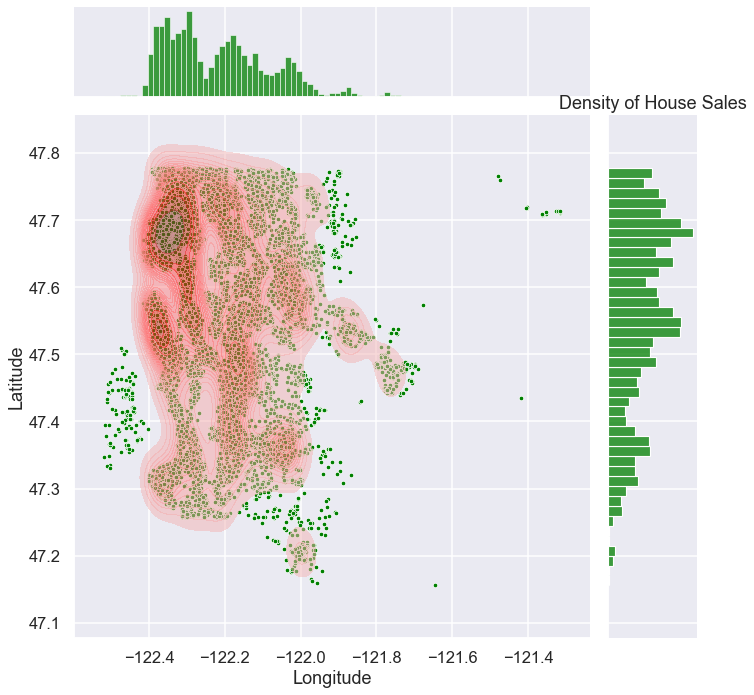

<IPython.core.display.Javascript object>

In [40]:
# Combined plot of scatter and density
sns.jointplot(data=df, x="long", y="lat", color="g", marker=".", height=10).plot_joint(
    sns.kdeplot, n_levels=20, shade=True, alpha=0.5, color="r"
).set_axis_labels("Longitude", "Latitude")
plt.title("Density of House Sales")

Text(0.5, 1.0, 'Houses with Coastal Views by Latitude and Longitude')

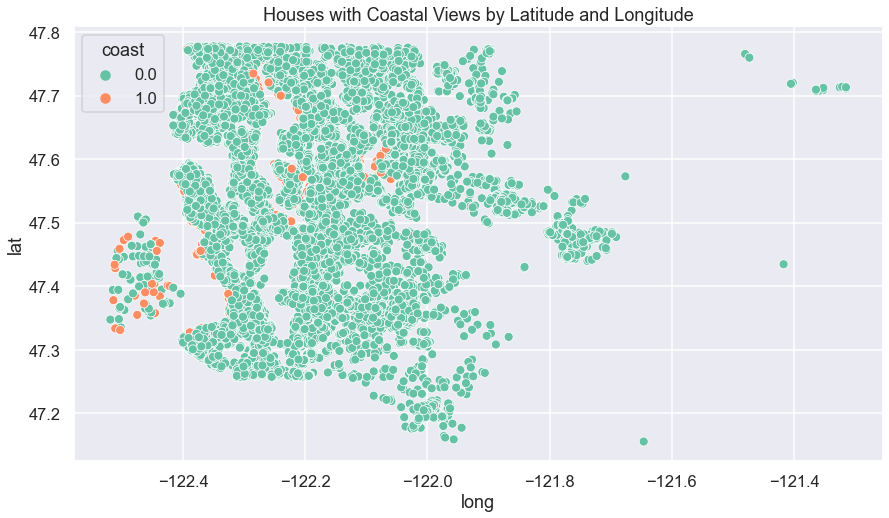

<IPython.core.display.Javascript object>

In [54]:
# Coastal views
plt.figure(figsize=(14.5, 8))
sns.scatterplot(data=df, x="long", y="lat", hue="coast", palette="Set2")
plt.title("Houses with Coastal Views by Latitude and Longitude")

Text(0.5, 1.0, 'House Sales by Price (darker = more expensive)')

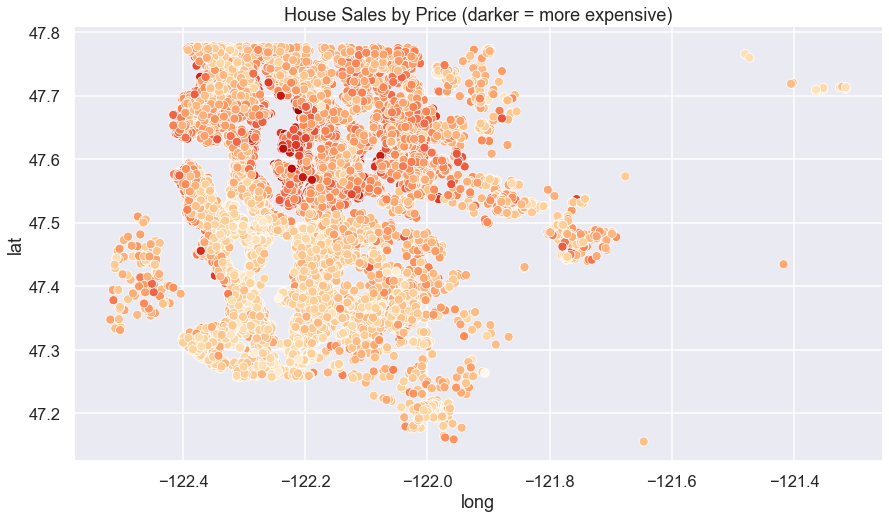

<IPython.core.display.Javascript object>

In [96]:
# House Prices (with natural log applied)
plt.figure(figsize=(14.5, 8))
sns.scatterplot(
    data=df,  # .drop(df.loc[df["price"] > 5000000].index),
    x="long",
    y="lat",
    hue=np.log(df["price"]),
    palette="OrRd",
    legend=False,
)
plt.title("House Sales by Price (darker = more expensive)")

Text(0.5, 1.0, 'House Sales by Lot Size (darker = bigger lot)')

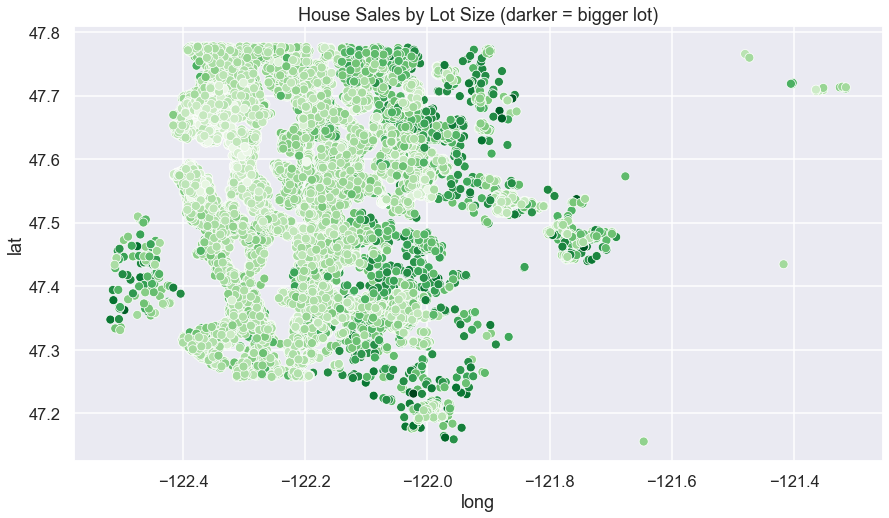

<IPython.core.display.Javascript object>

In [97]:
# Where are the houses with bigger lots? (with natural log applied)
plt.figure(figsize=(14.5, 8))
sns.scatterplot(
    data=df,
    x="long",
    y="lat",
    hue=np.log(df["lot_measure"]),
    palette="Greens",
    legend=False,
)
plt.title("House Sales by Lot Size (darker = bigger lot)")

Text(0.5, 1.0, 'House Sales by Year Built')

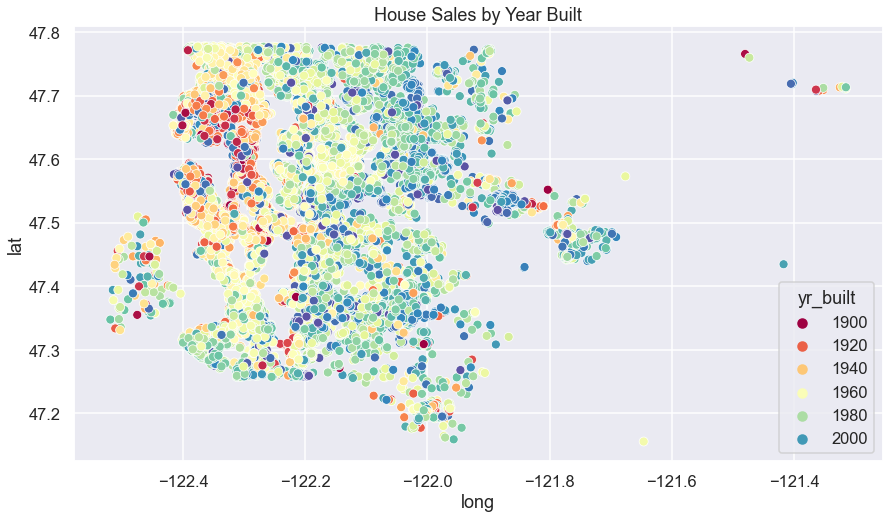

<IPython.core.display.Javascript object>

In [98]:
# Where are the older houses?
plt.figure(figsize=(14.5, 8))
sns.scatterplot(
    data=df, x="long", y="lat", hue="yr_built", palette="Spectral",
)
plt.title("House Sales by Year Built")

## Latitude and Longitude Plot Observations:
- Coastal properties are along the edges of water as expected
- Houses sell for higher along the coasts, Lake Sammamish, on Vashon and Mercer Islands, and in the city of Bellevue
- The further the house is away from the city center, the bigger the lot
- You can see the concentration of older houses around downtown Seattle and the newer houses sprawling outward

Text(0.5, 1.0, 'Average Condition Rating of Houses by Decade')

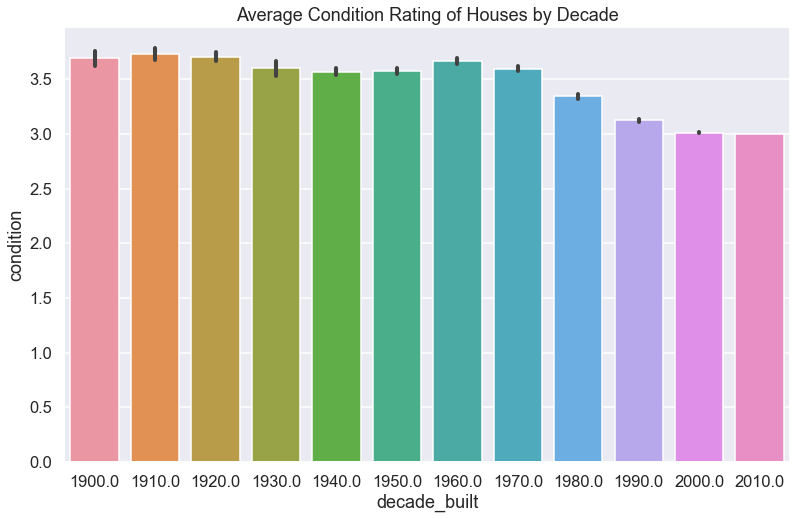

<IPython.core.display.Javascript object>

In [88]:
# What is the average condition by decade house was built?

# first find the decade and make a new column
df["decade_built"] = df["yr_built"] - df["yr_built"] % 10

plt.figure(figsize=(13, 8))
sns.barplot(data=df, x="decade_built", y="condition")
plt.title("Average Condition Rating of Houses by Decade")

Text(0.5, 1.0, 'Average Number of Bathrooms in Houses by Decade')

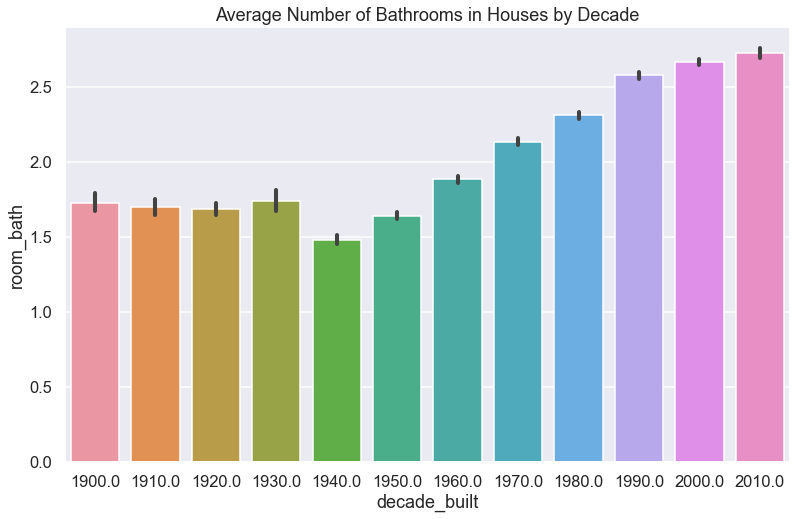

<IPython.core.display.Javascript object>

In [95]:
# What is the average number of bathrooms by decade house was built?

plt.figure(figsize=(13, 8))
sns.barplot(data=df, x="decade_built", y="room_bath")
plt.title("Average Number of Bathrooms in Houses by Decade")

Text(0.5, 1.0, 'Average Number of Bedrooms in Houses by Decade')

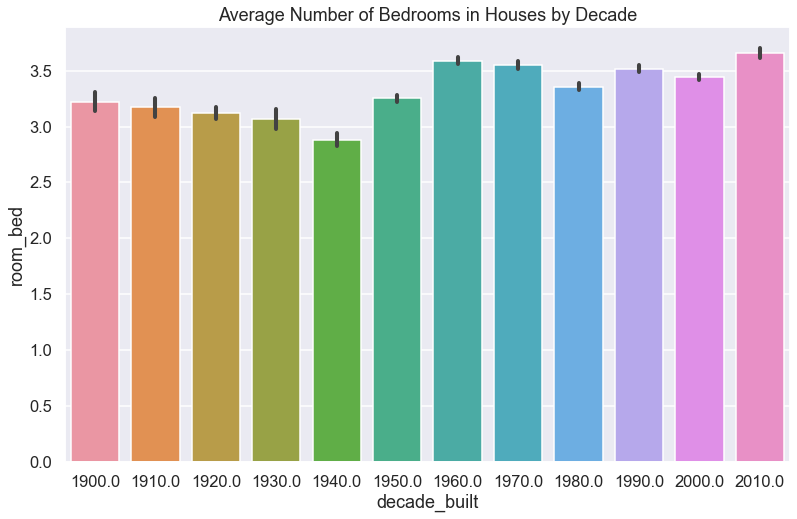

<IPython.core.display.Javascript object>

In [99]:
# What is the average number of bedrooms by decade house was built?

plt.figure(figsize=(13, 8))
sns.barplot(data=df, x="decade_built", y="room_bed")
plt.title("Average Number of Bedrooms in Houses by Decade")

Text(0.5, 1.0, 'Average Number of Floors in Houses by Decade')

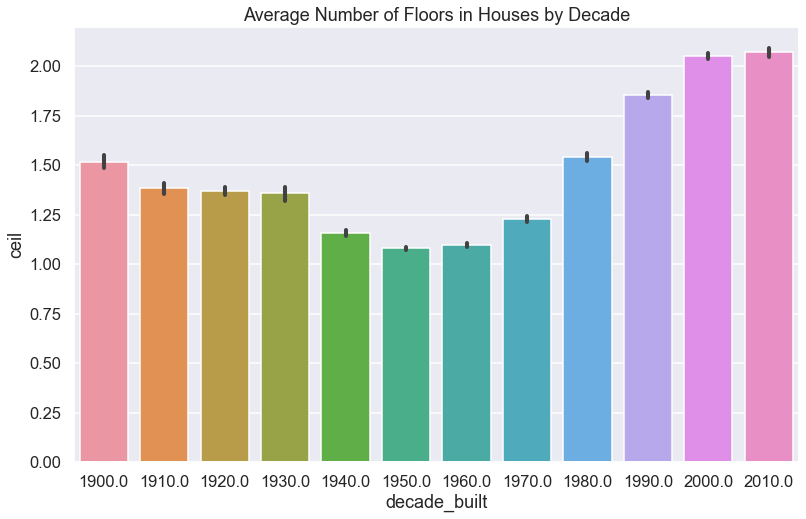

<IPython.core.display.Javascript object>

In [100]:
# What is the average number of floor levels by decade house was built?

plt.figure(figsize=(13, 8))
sns.barplot(data=df, x="decade_built", y="ceil")
plt.title("Average Number of Floors in Houses by Decade")

## Decade Year Built Observations
- Before 1960, the average house had 1.5 bathrooms, but every decade since then, the number of bathrooms on average has increased, up to 2.75 in 2010s
- The average number of bedrooms has fluctuated over the decades but remains about the same.
- Houses built in the 1990s and 2000s are rated lower in condition than previous decades. This might be because older houses in poor condition have since been demolished, and the old houses remaining are well taken care of.
- The average number of floors per house started at 1.5 in the 1900s and then dipped in the 1950's before rising again up to an average of 2 floors in the 2010s.

## This is the end of our initial anlysis
- We would have liked to do more insightful multivariate graphs, but some of the features need more work, such as the renovation and basement features.

# Final Takeaways:
- We did not split the data into training and testing sets for this initial analysis, but we will do so before feature-engineering in the next step so as to avoid data leakage.
- So far we've seen a lot of variables influencing price, but it's critical for model-building to eliminate highly correlated features and narrow in on the most important features that will determine the most accurate price for selling homes.
- As we saw in the latitude and longitude plots with lot size and price, scaling by natural logarithm was essential to make the color hues more gradual and get an intuitive visualization. Therefore, we know scaling will be needed on these features and more to prepare them for linear regression.
- We will treat missing values and outliers and probably add some new features, and finally, we will look into Ridge and Lasso regularization
- The ultimate goal is designing a linear regression model that is not too complex (overfitting) and has very low error in production so that clients can spend less time readjusting home prices, and more time living their lives.